# EDA

Se importan las librerías que se utilizarán a lo largo del EDA.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
import os
import string
from wordcloud import WordCloud




Se importan los Datasets de forma que puedan ser leídos en cualquier entorno virtual

In [5]:
base_dir = os.getcwd()

file_path = os.path.join(base_dir, 'Datasets', 'movies_FINAL.csv')
print("Ruta absoluta del archivo CSV:", os.path.abspath(file_path))
df_peliculas = pd.read_csv(file_path)

file_path1 = os.path.join(base_dir, 'Datasets', 'cast.parquet')
print("Ruta absoluta del archivo Parquet:", os.path.abspath(file_path1))
df_cast = pd.read_parquet(file_path1)

file_path2 = os.path.join(base_dir, 'Datasets', 'crew.parquet')
print("Ruta absoluta del archivo Parquet:", os.path.abspath(file_path2))
df_crew = pd.read_parquet(file_path2)

Ruta absoluta del archivo CSV: c:\Users\jessi\Desktop\PI Henry\Datasets\movies_FINAL.csv
Ruta absoluta del archivo Parquet: c:\Users\jessi\Desktop\PI Henry\Datasets\cast.parquet
Ruta absoluta del archivo Parquet: c:\Users\jessi\Desktop\PI Henry\Datasets\crew.parquet


- Movies_final: 
El dataset contiene una amplia variedad de información sobre películas, abarcando desde detalles de producción hasta características específicas de cada película.

- Crew:
Contiene información sobre el equipo de producción de las películas.
Columnas principales: movie_id, crew_credit_id, crew_department, crew_gender, crew_job, crew_name, crew_profile_path.

- Cast:
Contiene información sobre los actores y actrices de las películas.
Columnas principales: movie_id, cast_cast_id, cast_character, cast_gender, cast_id, cast_name, cast_order, cast_profile_path.

# Tipo de datos

- Datos Nominales: Son categóricos y suelen ser nombres, géneros, categorías, etc.

- Datos Cuantitativos: Son numéricos y pueden medirse. Pueden ser discretos o continuos

 #### movies_FINAL.csv

- Datos Nominales:
title: Nombre de la película.
genres: Géneros de la película.
original_language: Idioma original de la película.
status: Estado de la película (por ejemplo, "Released", "Post Production").
production_companies: Compañías de producción involucradas.
production_countries: Países de producción.

- Datos Cuantitativos:
budget: Presupuesto de la película.
revenue: Ingresos generados por la película.
runtime: Duración de la película en minutos.
vote_average: Promedio de votos de la película.
vote_count: Número de votos recibidos por la película.
release_date: Fecha de lanzamiento (puede ser tratado como cuantitativo si se descompone en año, mes, día).

#### cast.parquet

- Datos Nominales:
movie_id: ID de la película.
cast_id: Identificador del elenco.
character: Personaje interpretado.
gender: Género del actor.
name: Nombre del actor.
cast_profile_path:url al portfolio.

- Datos Cuantitativos:
order: Número de aparición en los créditos.
 
 #### crew.parquet

- Datos Nominales:
movie_id: ID de la película.
department: Departamento al que pertenece el miembro del equipo.
job: Trabajo específico del miembro del equipo.
name: Nombre del miembro del equipo.
gender: Género del miembro del equipo.
credit_id: ID del crédito.
profile_path: url hacia el portfolio.

- Datos Cuantitativos:
Ninguno


Información sobre cada columna

In [4]:
df_peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   adult                     45463 non-null  bool   
 1   budget                    45463 non-null  int64  
 2   homepage                  7779 non-null   object 
 3   movie_id                  45463 non-null  int64  
 4   imdb_id                   45446 non-null  object 
 5   original_language         45452 non-null  object 
 6   original_title            45463 non-null  object 
 7   overview                  44509 non-null  object 
 8   popularity                45463 non-null  float64
 9   release_date              45379 non-null  object 
 10  revenue                   45463 non-null  int64  
 11  runtime                   45206 non-null  float64
 12  status                    45382 non-null  object 
 13  title                     45463 non-null  object 
 14  video 

In [5]:
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564892 entries, 0 to 564891
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   movie_id        564892 non-null  int64  
 1   cast_character  562474 non-null  object 
 2   cast_gender     562474 non-null  float64
 3   cast_name       562474 non-null  object 
 4   cast_order      562474 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 21.5+ MB


In [6]:
df_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465085 entries, 0 to 465084
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           465085 non-null  int64  
 1   crew_credit_id     464314 non-null  object 
 2   crew_department    464314 non-null  object 
 3   crew_gender        464314 non-null  float64
 4   crew_job           464314 non-null  object 
 5   crew_name          464314 non-null  object 
 6   crew_profile_path  95098 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.8+ MB


Estadisticas descriptivas de las variables cuantitativas

In [7]:
df_peliculas.describe() #Columnas de ID no corresponden a este analisis por su tipo de variable.

,budget,movie_id,popularity,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45463.000000,45463.000000,4.546300e+04,45206.000000,45463.000000,45463.000000
mean,4.224579e+06,108359.918813,2.921378,1.120861e+07,94.127572,5.618217,109.890856
std,1.742413e+07,112460.749278,6.005234,6.433019e+07,38.406803,1.924174,491.294816
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,26449.500000,0.385945,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,60003.000000,1.127757,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,157328.000000,3.678588,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


In [8]:
df_cast.describe() #Columnas de ID no corresponden a este analisis por su tipo de variable.

,movie_id,cast_gender,cast_order
count,564892.000000,562474.000000,562474.000000
mean,94039.108192,1.004887,11.845627
std,109095.910194,0.895108,16.005299
min,2.000000,0.000000,0.000000
25%,17006.000000,0.000000,3.000000
50%,45220.000000,1.000000,7.000000
75%,125077.000000,2.000000,14.000000
max,469172.000000,2.000000,313.000000


El dataset df_crew no tiene columnas cuantitativas que correspondan a este análisis

## Identificación de valores nulos


In [9]:
null_values1 = df_peliculas.isnull().sum()
null_values1

adult                           0
budget                          0
homepage                    37684
movie_id                        0
imdb_id                        17
original_language              11
original_title                  0
overview                      954
popularity                      0
release_date                   84
revenue                         0
runtime                       257
status                         81
title                           0
video                           0
vote_average                    0
vote_count                      0
collection_name             42295
collection_backdrop_path    42295
company_names_array             0
countries_names_array           0
languages_names_array           0
genres_names_array              0
dtype: int64

Movies_final:
Hay varias columnas con valores nulos, especialmente homepage, collection_name y collection_backdrop_path.

In [10]:
null_values2 = df_cast.isnull().sum()
null_values2

movie_id             0
cast_character    2418
cast_gender       2418
cast_name         2418
cast_order        2418
dtype: int64

La columna cast_profile_path muestra un alto número de valores nulos (176,274), lo que indica que muchos actores y actrices no tienen una imagen de perfil asociada.

La columna cast_character tiene 28,201 valores nulos, lo que podría indicar que el personaje no está especificado para ciertos actores en algunas películas.

Varias columnas (cast_cast_id, cast_gender, cast_id, cast_name, cast_order) tienen 2,418 valores nulos, lo que podría indicar registros incompletos para ciertos actores en algunas películas.

In [11]:
null_values3 = df_crew.isnull().sum()
null_values3

movie_id                  0
crew_credit_id          771
crew_department         771
crew_gender             771
crew_job                771
crew_name               771
crew_profile_path    369987
dtype: int64

-Crew
La columna crew_profile_path presenta un alto número de valores nulos (369,987), lo que sugiere que no todos los miembros del equipo tienen una imagen de perfil asociada.

Otras columnas (crew_credit_id, crew_department, crew_gender, crew_job, crew_name) tienen 771 valores nulos, lo que podría indicar registros incompletos para ciertos miembros del equipo en algunas películas.


# Identificación de valores faltantes

In [12]:
def missing_values_analysis(df, df_name):
    missing_count = df.isnull().sum()
    
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    
    missing_df = pd.DataFrame({'missing_count': missing_count, 'missing_percentage': missing_percentage})
    
    missing_df = missing_df[missing_df['missing_count'] > 0]
    
    print(f"\nAnálisis de valores faltantes para {df_name}:")
    print(missing_df)

missing_values_analysis(df_peliculas, "movies_FINAL.csv")
missing_values_analysis(df_cast, "cast.parquet")
missing_values_analysis(df_crew, "crew.parquet")


Análisis de valores faltantes para movies_FINAL.csv:
                          missing_count  missing_percentage
homepage                          37684           82.889383
imdb_id                              17            0.037393
original_language                    11            0.024195
overview                            954            2.098410
release_date                         84            0.184766
runtime                             257            0.565295
status                               81            0.178167
collection_name                   42295           93.031696
collection_backdrop_path          42295           93.031696

Análisis de valores faltantes para cast.parquet:
                missing_count  missing_percentage
cast_character           2418            0.428046
cast_gender              2418            0.428046
cast_name                2418            0.428046
cast_order               2418            0.428046

Análisis de valores faltantes para crew.parqu

Debido a este análisis se procederá a eliminar:
- movies_final: homepage, collection name y collection_backdrop_path.
- crew: crew_profile_path

porque su porcentaje de valores perdidos es demasiado alto. De haber sido un número más bajo el tratamiento podría haber sido imputar valores faltantes con tendencias centrales.

In [13]:
df_peliculas= df_peliculas.drop(columns=["homepage","collection_name","collection_backdrop_path"])

In [14]:
df_crew=df_crew.drop(columns="crew_profile_path")

# Identificación de valores duplicados

In [15]:
df_peliculas[df_peliculas.duplicated(keep=False)]


,adult,budget,movie_id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,company_names_array,countries_names_array,languages_names_array,genres_names_array
676,False,0,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",0.122178,1995-02-16,0,115.0,Released,The Promise,False,5.0,1,"['Studio Babelsberg', 'Centre National de la C...",['Germany'],['Deutsch'],"['Drama', 'Romance']"
1465,False,0,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",0.122178,1995-02-16,0,115.0,Released,The Promise,False,5.0,1,"['Studio Babelsberg', 'Centre National de la C...",['Germany'],['Deutsch'],"['Drama', 'Romance']"
7345,False,0,5511,tt0062229,fr,Le Samouraï,Hitman Jef Costello is a perfectionist who alw...,9.091288,1967-10-25,39481,105.0,Released,Le Samouraï,False,7.9,187,"['Fida cinematografica', 'Compagnie Industriel...","['France', 'Italy']",['Français'],"['Crime', 'Drama', 'Thriller']"
8068,False,0,23305,tt0295682,en,The Warrior,"In feudal India, a warrior (Khan) who renounce...",1.967992,2001-09-23,0,86.0,Released,The Warrior,False,6.3,15,['Filmfour'],"['France', 'Germany', 'India', 'United Kingdom']",['हिन्दी'],"['Adventure', 'Animation', 'Drama', 'Action', ..."
9165,False,0,5511,tt0062229,fr,Le Samouraï,Hitman Jef Costello is a perfectionist who alw...,9.091288,1967-10-25,39481,105.0,Released,Le Samouraï,False,7.9,187,"['Fida cinematografica', 'Compagnie Industriel...","['France', 'Italy']",['Français'],"['Crime', 'Drama', 'Thriller']"
9327,False,0,23305,tt0295682,en,The Warrior,"In feudal India, a warrior (Khan) who renounce...",1.967992,2001-09-23,0,86.0,Released,The Warrior,False,6.3,15,['Filmfour'],"['France', 'Germany', 'India', 'United Kingdom']",['हिन्दी'],"['Adventure', 'Animation', 'Drama', 'Action', ..."
13220,False,0,159849,tt0173769,en,Why We Fight: Divide and Conquer,"The third film of Frank Capra's 'Why We Fight""...",0.473322,1943-01-01,0,57.0,Released,Why We Fight: Divide and Conquer,False,5.0,1,[],['United States of America'],['English'],['Documentary']
13261,False,0,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,2008-12-26,0,108.0,Released,Blackout,False,6.7,3,['Filmiteollisuus Fine'],['Finland'],['suomi'],"['Thriller', 'Mystery']"
13375,False,0,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,2008-12-26,0,108.0,Released,Blackout,False,6.7,3,['Filmiteollisuus Fine'],['Finland'],['suomi'],"['Thriller', 'Mystery']"
13603,False,0,168538,tt0084387,en,Nana,"In Zola's Paris, an ingenue arrives at a tony ...",1.276602,1983-06-13,0,92.0,Released,"Nana, the True Key of Pleasure",False,4.7,3,"['Cannon Group', 'Metro-Goldwyn-Mayer (MGM)']",[],[],"['Drama', 'Comedy']"


In [16]:
df_cast[df_cast.duplicated(keep=False)]


,movie_id,cast_character,cast_gender,cast_name,cast_order
11149,105045,Sophie II,1.0,Corinna Harfouch,0.0
11150,105045,Sophie I,1.0,Meret Becker,1.0
11151,105045,Konrad,2.0,August Zirner,2.0
11152,105045,Barbara,1.0,Eva Mattes,3.0
11153,105045,Müller,2.0,Hark Bohm,4.0
...,...,...,...,...,...
563291,265189,Brady,2.0,Brady Corbet,5.0
563292,265189,Mats,2.0,Kristofer Hivju,6.0
563293,265189,Fanni,0.0,Fanni Metelius,7.0
563294,265189,Charlotte,0.0,Karin Myrenberg,8.0


In [17]:
df_crew[df_crew.duplicated(keep=False)]


,movie_id,crew_credit_id,crew_department,crew_gender,crew_job,crew_name
11118,105045,52fe4a44c3a36847f81c463f,Directing,1.0,Director,Margarethe von Trotta
11119,105045,52fe4a44c3a36847f81c4645,Writing,2.0,Writer,Peter Schneider
11120,105045,52fe4a44c3a36847f81c464b,Writing,0.0,Writer,Felice Laudadio
11121,105045,52fe4a44c3a36847f81c4651,Writing,1.0,Writer,Margarethe von Trotta
13323,132641,52fe4b9ac3a368484e190d25,Directing,0.0,Director,Mikio Naruse
...,...,...,...,...,...,...
464049,265189,54af183d9251411ef60029eb,Editing,0.0,Editor,Jacob Secher Schulsinger
464050,265189,54af18499251414a3d000441,Production,0.0,Casting,Katja Wik
464051,265189,54af185592514169e0002b00,Art,0.0,Production Design,Josefin Åsberg
464052,265189,54af1862c3a3682e400004a7,Art,0.0,Art Direction,Josefin Åsberg


Debido a la naturaleza de estos datasets el tratamiento que se dará a valores duplicados será eliminarlos, ya que no representan eventos repetidos y pueden entorpecer análisis futuros.

In [18]:
df_peliculas= df_peliculas.drop_duplicates()

In [19]:
df_crew= df_crew.drop_duplicates()

In [20]:
df_cast= df_cast.drop_duplicates()

# Gráficos de análisis

Aclaración: Las correlaciones bi y multivariadas no demuestran causalidad sino CORRELACIÓN.

Gráfico de correlación multivariada entre variables numéricas


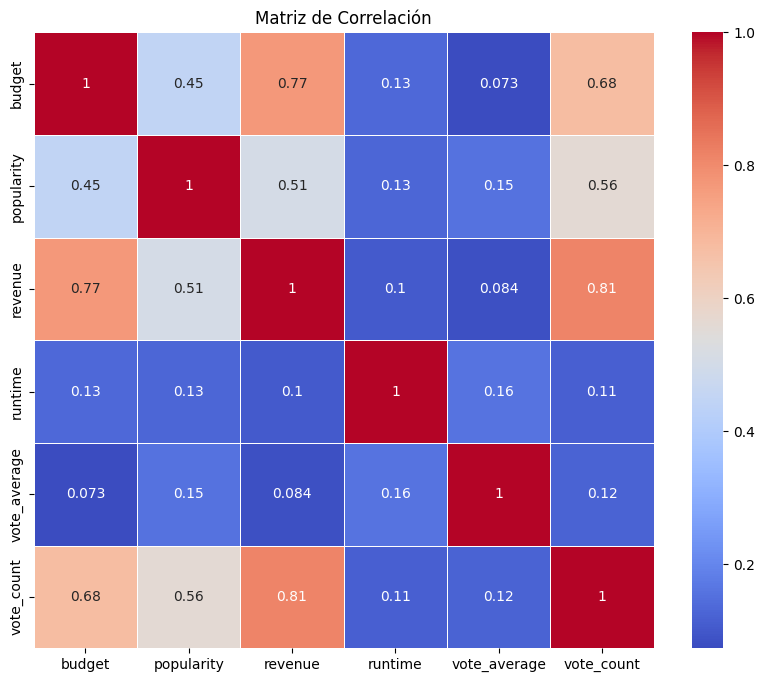

In [21]:
correlation_matrix = df_peliculas.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.drop(index='movie_id', columns='movie_id'), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()



- budget vs revenue (0.77):

Existe una fuerte correlación positiva entre el presupuesto de una película y sus ingresos. Esto sugiere que, generalmente, películas con presupuestos más altos tienden a generar mayores ingresos.

- revenue vs vote_count (0.81):

Existe una fuerte correlación positiva entre la recaudación de la película y el número de votos recibido por la película en TMBD. Una posible explicación es que las películas que reciben más votos (indicativo de mayor popularidad y visibilidad) también tienden a generar mayores ingresos en taquilla.
También, las películas de alta calidad pueden atraer a más votantes y al mismo tiempo lograr mayores recaudaciones debido a buenas críticas y recomendaciones.

- budget vs vote_count (0.68):
Una correlación de 0.68 entre budget y vote_count indica una correlación positiva moderada a fuerte entre estas dos variables. Esto significa que, en tu conjunto de datos, a medida que el presupuesto (budget) de una película aumenta, también tiende a aumentar el número de votos (vote_count), y viceversa.
Una posible explicación podria ser que las películas con un presupuesto mayor pueden tener una distribución más amplia, llegando a más cines y plataformas de streaming, lo que puede incrementar el número de votos.

- popularity vs revenue (0.51):
Una correlación de 0.51 entre popularity y revenue indica una correlación positiva moderada entre estas dos variables.
Esto puede explicarse porque las películas que son más populares tienden a atraer a más espectadores, lo que puede resultar en mayores ingresos en taquilla.

- popularity y vote_count (0.56):
Una correlación de 0.56 entre popularity y vote_count indica una correlación positiva moderada entre estas dos variables.Una posible explicación puede ser que las películas que generan más interés y discusión entre el público pueden atraer a más votantes, incrementando así el número de votos.





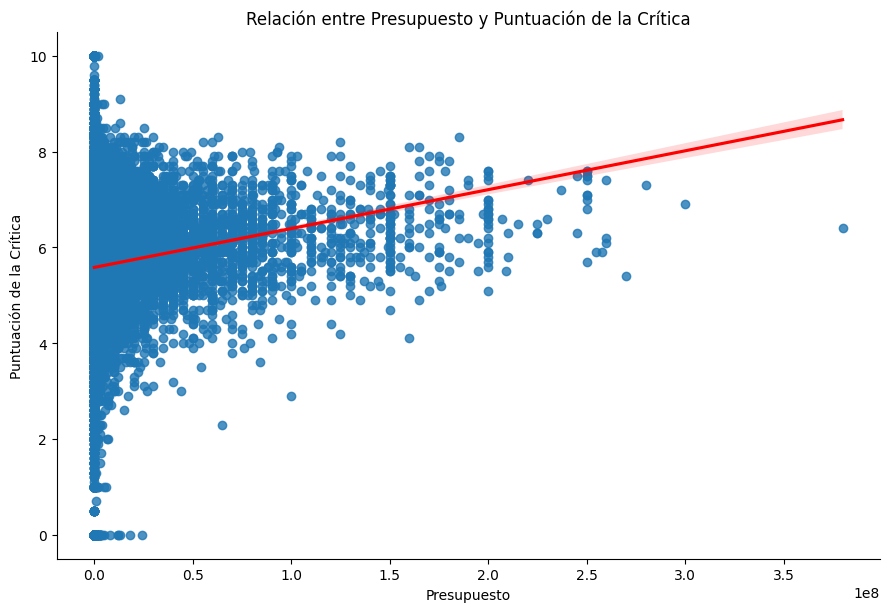

In [22]:
sns.lmplot(x='budget', y='vote_average', data=df_peliculas, aspect=1.5, height=6, line_kws={'color': 'red'})
plt.title('Relación entre Presupuesto y Puntuación de la Crítica')
plt.xlabel('Presupuesto')
plt.ylabel('Puntuación de la Crítica')
plt.show()


Se observa una línea de tendencia positiva en la relación entre presupuesto y puntuación de la crítica (gráfico anterior). Mientras más se invierte en una película es más probable que se obtengan mejores puntuaciones.

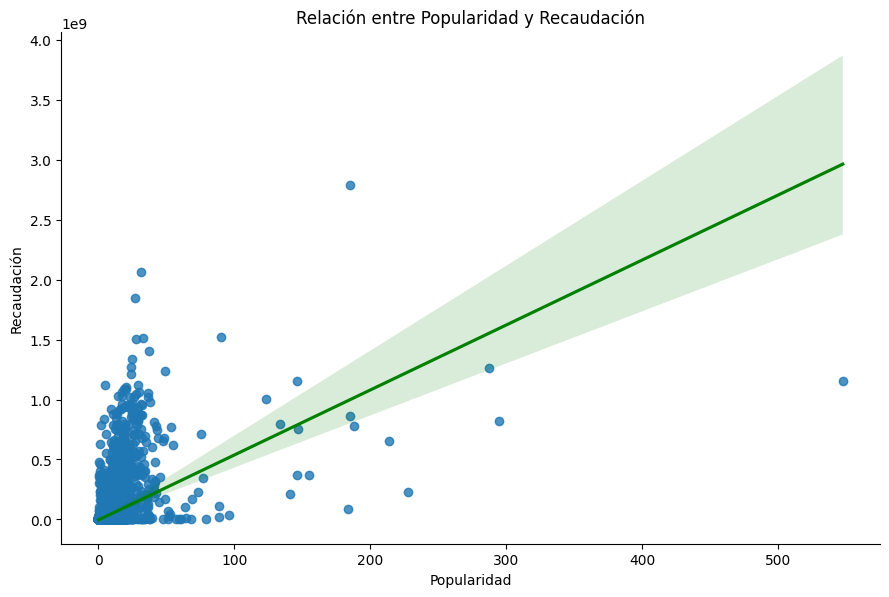

In [23]:
sns.lmplot(x='popularity', y='revenue', data=df_peliculas, aspect=1.5, height=6, line_kws={'color': 'green'})
plt.title('Relación entre Popularidad y Recaudación')
plt.xlabel('Popularidad')
plt.ylabel('Recaudación')
plt.show()


La línea de regresión verde indica la relación lineal entre la popularidad y la recaudación. La pendiente positiva de la línea sugiere que, en general, a medida que aumenta la popularidad de una película, también aumenta la recaudación. 
La sombra verde alrededor de la línea de tendencia representa el intervalo de confianza. Este intervalo muestra la incertidumbre alrededor de la estimación de la línea de tendencia. Un intervalo de confianza más estrecho indica una estimación más precisa de la línea de tendencia. En este caso es bastante amplia.

La alta concentración de puntos cerca del origen sugiere que la mayoría de las películas tienen una popularidad y recaudación bajas.
Los puntos que están más alejados del origen y de la mayoría de los otros puntos (outliers) pueden representar películas con una popularidad y/o recaudación excepcionalmente alta.

Aunque hay una relación positiva entre popularidad y recaudación, la dispersión de los puntos alrededor de la línea de tendencia sugiere que la relación no es perfecta. Hay una variabilidad considerable, lo que significa que la popularidad no es el único factor que afecta la recaudación de las películas.

genres_names_array
Drama              20253
Comedy             13178
Thriller            7621
Romance             6733
Action              6593
Horror              4672
Crime               4306
Documentary         3931
Adventure           3494
Science Fiction     3046
Family              2770
Mystery             2465
Fantasy             2311
Animation           1933
Foreign             1620
Music               1598
History             1398
War                 1323
Western             1042
TV Movie             767
Name: count, dtype: int64


C:\Users\jessi\AppData\Local\Temp\ipykernel_8712\3794540883.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index,palette=palette)


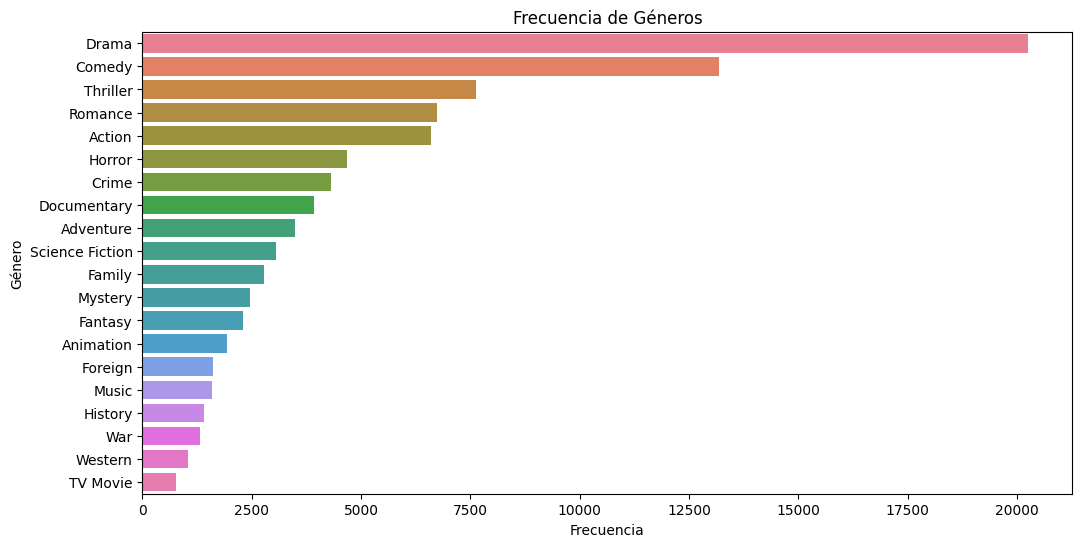

In [24]:
def safe_eval(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return val
    return val

df_peliculas['genres_names_array'] = df_peliculas['genres_names_array'].apply(safe_eval)

df = df_peliculas.loc[:, ~df_peliculas.columns.duplicated()]

all_genres = df_peliculas['genres_names_array'].explode()

genre_counts = all_genres.value_counts()

print(genre_counts)

plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", len(genre_counts))
sns.barplot(x=genre_counts.values, y=genre_counts.index,palette=palette)
plt.title('Frecuencia de Géneros')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.show()


C:\Users\jessi\AppData\Local\Temp\ipykernel_8712\914966508.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_revenue_by_genre.values, y=average_revenue_by_genre.index, palette='viridis')


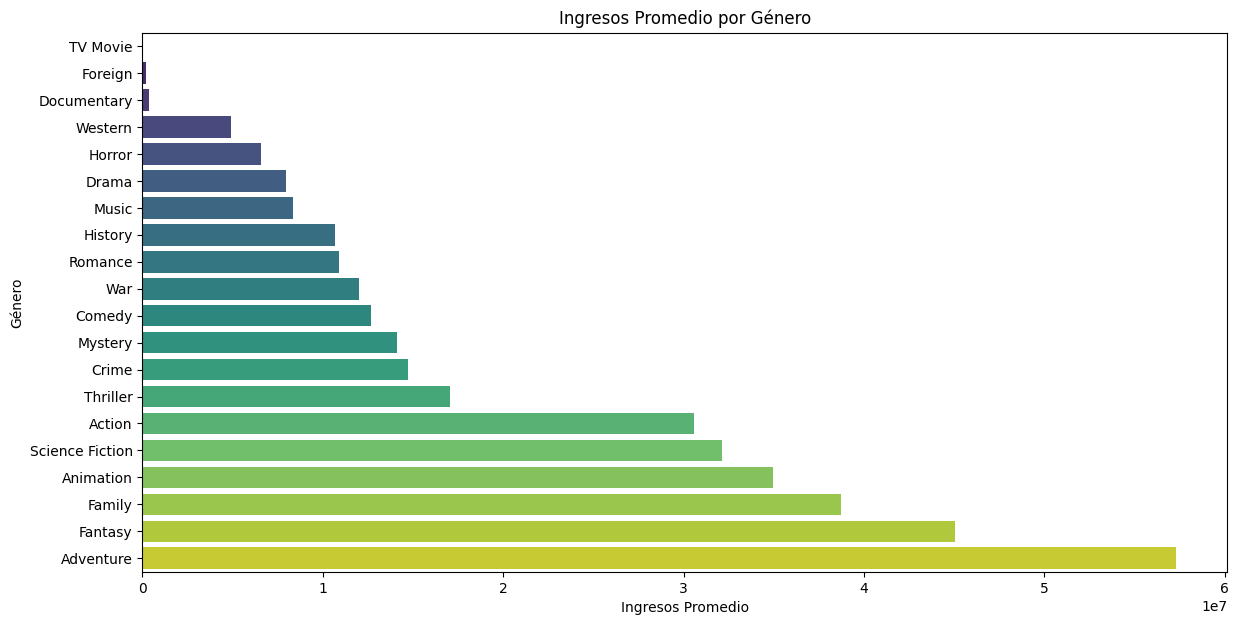

In [25]:
def safe_eval(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return val
    return val

df_peliculas['genres_names_array'] = df_peliculas['genres_names_array'].apply(safe_eval)

all_genres_expanded = df_peliculas.explode('genres_names_array')

average_revenue_by_genre = all_genres_expanded.groupby('genres_names_array')['revenue'].mean().sort_values()

plt.figure(figsize=(14, 7))
sns.barplot(x=average_revenue_by_genre.values, y=average_revenue_by_genre.index, palette='viridis')
plt.title('Ingresos Promedio por Género')
plt.xlabel('Ingresos Promedio')
plt.ylabel('Género')
plt.show()

En los gráficos anteriores se analizaron la frecuencia y recaudación de los géneros de las películas. A partir de este análisis se concluye que mientras el género más hecho es el de drama, el que más ha recaudado es el de aventura. Información descriptiva que puede ser útil para saber qué tipo de géneros producir en el futuro.

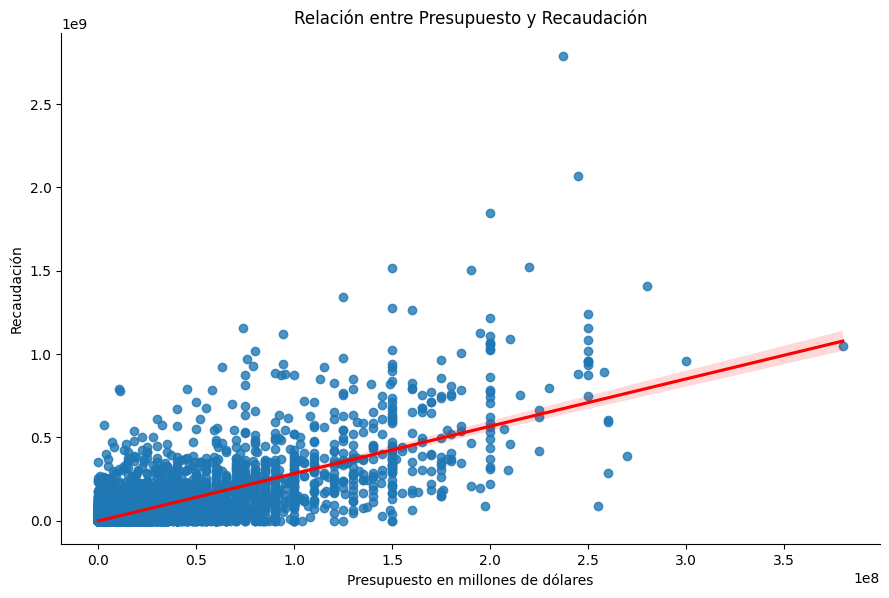

In [26]:
sns.lmplot(x='budget', y='revenue', data=df_peliculas, aspect=1.5, height=6, line_kws={'color': 'red'})

plt.title('Relación entre Presupuesto y Recaudación')
plt.xlabel('Presupuesto en millones de dólares')
plt.ylabel('Recaudación')
plt.show()



En el gráfico anterior podemos ver la relación entre presupuesto y recaudación, que nos da un panorama de cuánto se recauda en función de cuánto se invierte. A continuación se incluye un gráfico de cuánto se ha invertido promedio por año y por otro lado cuánto se ha recaudado para analizar ambos aspectos de forma indepnediente en caso de ser necesario.

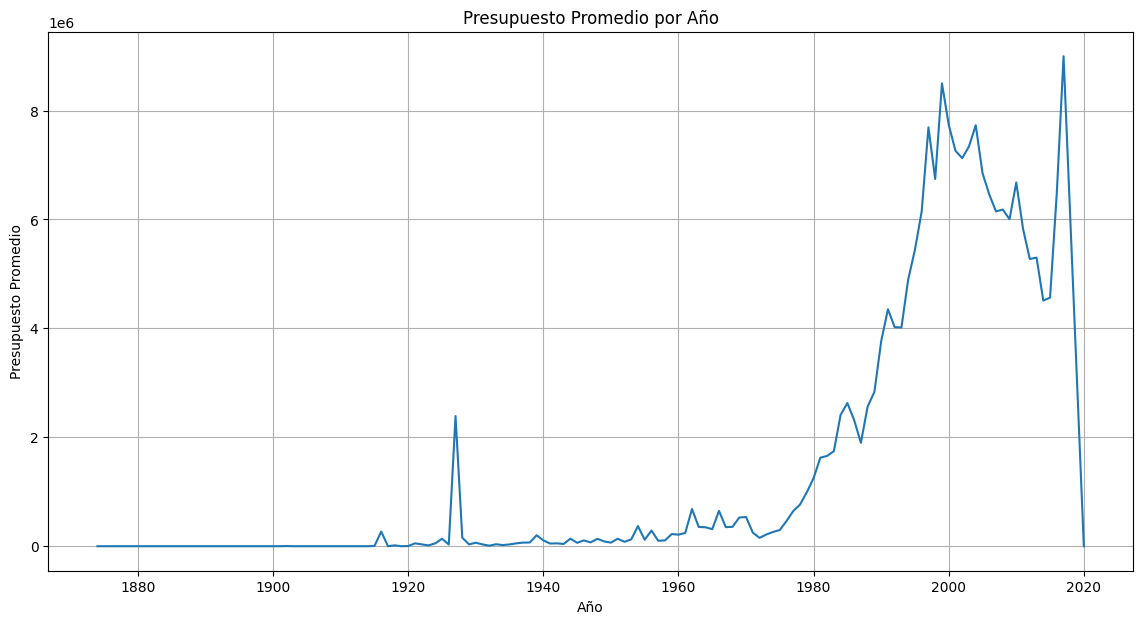

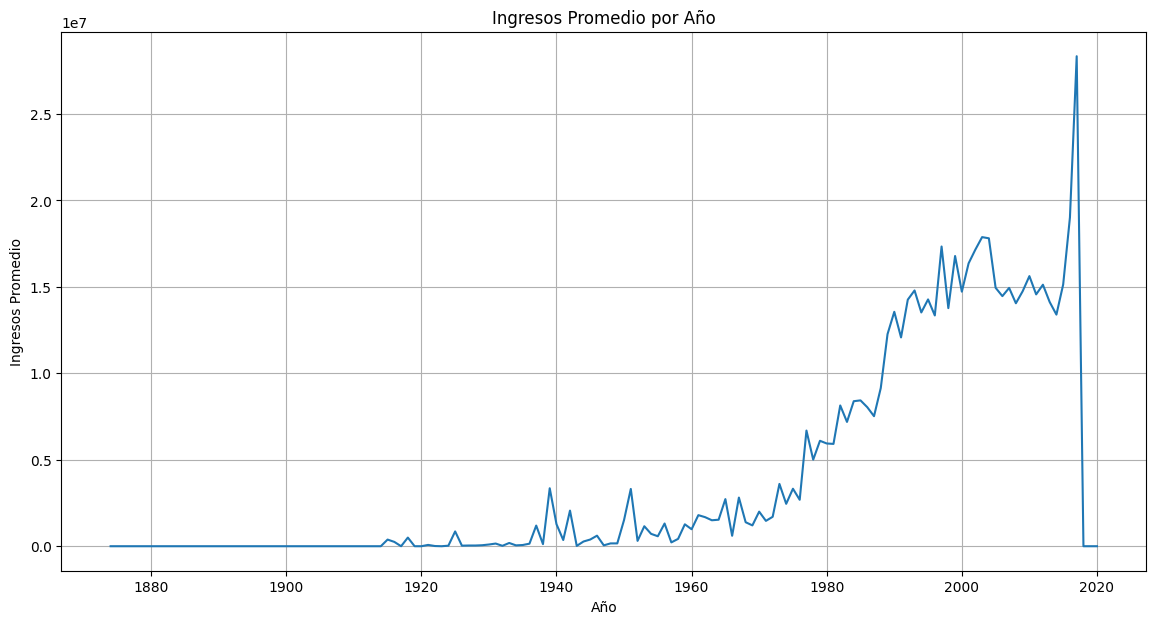

In [27]:
df_peliculas['release_date'] = pd.to_datetime(df_peliculas['release_date'], errors='coerce')

df_peliculas = df_peliculas.dropna(subset=['release_date'])

df_peliculas['release_year'] = df_peliculas['release_date'].dt.year

df_peliculas = df_peliculas.dropna(subset=['release_year'])

movies_per_year = df_peliculas['release_year'].value_counts().sort_index()

average_budget_per_year = df_peliculas.groupby('release_year')['budget'].mean()

average_revenue_per_year = df_peliculas.groupby('release_year')['revenue'].mean()


# Visualizar el presupuesto promedio por año
plt.figure(figsize=(14, 7))
sns.lineplot(x=average_budget_per_year.index, y=average_budget_per_year.values)
plt.title('Presupuesto Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Presupuesto Promedio')
plt.grid(True)
plt.show()

# Visualizar los ingresos promedio por año
plt.figure(figsize=(14, 7))
sns.lineplot(x=average_revenue_per_year.index, y=average_revenue_per_year.values)
plt.title('Ingresos Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos Promedio')
plt.grid(True)
plt.show()

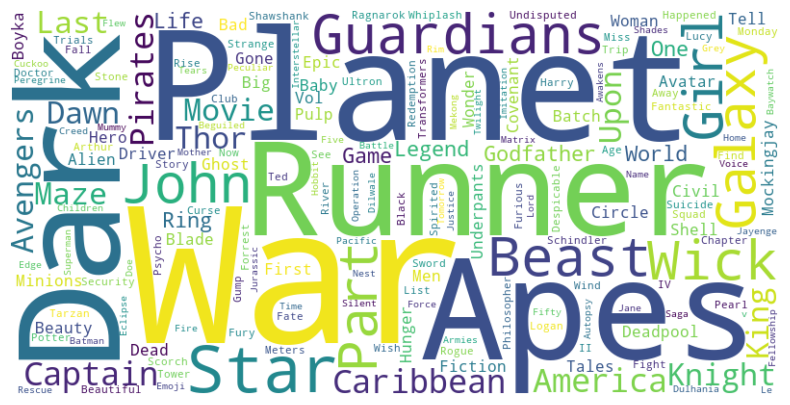

In [6]:
if df_peliculas is not None:
    # Filtrar las películas más populares, por ejemplo, las 100 más populares
    # Asumiendo que 'popularity' es la columna que indica la popularidad de las películas
    top_movies = df_peliculas.nlargest(100, 'popularity')

    # Combinar los títulos de las películas más populares en un solo texto
    text = ' '.join(top_movies['title'].dropna())

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No se pudo leer el archivo CSV, por lo tanto no se realizó la nube de palabras.")


La nube de palabras anterior nos ayuda a saber cuáles fueron las palabras más repetidas en relacióna los 100 títulos más populares , lo cual puede ser importante para saber las temáticas que más le interesan al público.

Datos de películas:
   adult    budget  movie_id    imdb_id original_language  \
0  False  30000000       862  tt0114709                en   
1  False  65000000      8844  tt0113497                en   
2  False         0     15602  tt0113228                en   
3  False  16000000     31357  tt0114885                en   
4  False         0     11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  popularity release_date  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   1995-10-30   
1  When siblings Judy and Peter discover an encha...   17.015539   1995-12-15   
2  A family wedding reignites the ancient feud be...   11.712900   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...    3.859495   1995-12-22   
4  

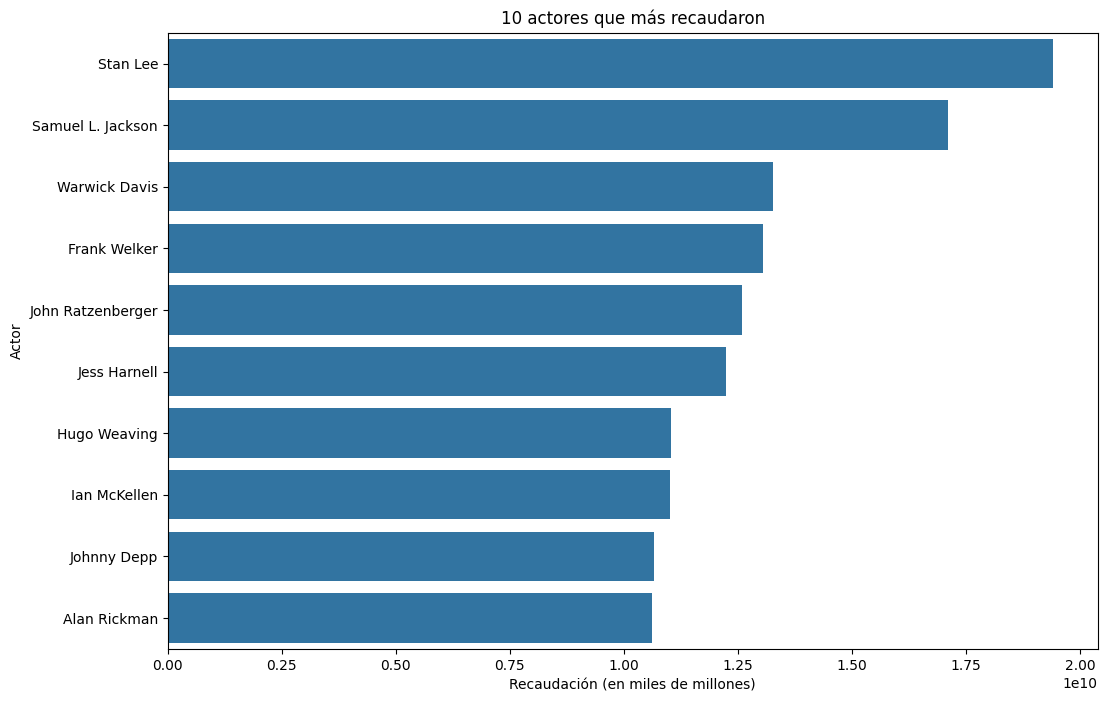

In [29]:
df_peliculas['release_date'] = pd.to_datetime(df_peliculas['release_date'], errors='coerce')

print("Datos de películas:")
print(df_peliculas.head())
print(df_peliculas.info())

print("\nDatos de cast:")
print(df_cast.head())
print(df_cast.info())

df_combined = df_cast.merge(df_peliculas[['movie_id', 'revenue']], left_on='movie_id', right_on='movie_id', how='inner')


recaudacion_por_actor = df_combined.groupby('cast_name')['revenue'].sum().reset_index()

recaudacion_por_actor = recaudacion_por_actor.sort_values(by='revenue', ascending=False)

print("\nRecaudación por actor:")
print(recaudacion_por_actor.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='revenue', y='cast_name', data=recaudacion_por_actor.head(10))
plt.title('10 actores que más recaudaron')
plt.xlabel('Recaudación (en miles de millones)')
plt.ylabel('Actor')
plt.show()

En el gráfico anterior se muestran los 10 actores que mas recaudaron. Información que puede orientar a las productoras a qué actores elegir para optimizar su presupuesto.